In [9]:
!pip install fredapi > null


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred


In [3]:
fred_key = '42123b6d2f54c162c85ddecc8f077c78'

# 1. Create the fred object

In [9]:
fred = Fred(api_key = fred_key)

# 2. Search Fred for economic data

In [11]:
fred.search('S&P', limit = 1005)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CSUSHPINSA,CSUSHPINSA,2025-03-03,2025-03-03,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-12-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2025-02-25 08:11:20-06:00,88,"For more information regarding the index, plea..."
CSUSHPISA,CSUSHPISA,2025-03-03,2025-03-03,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-12-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2025-02-25 08:11:22-06:00,78,"For more information regarding the index, plea..."
SP500,SP500,2025-03-03,2025-03-03,S&P 500,2015-03-04,2025-03-03,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2025-03-03 19:11:39-06:00,83,The observations for the S&P 500 represent the...
SPCS20RSA,SPCS20RSA,2025-03-03,2025-03-03,S&P CoreLogic Case-Shiller 20-City Composite H...,2000-01-01,2024-12-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2025-02-25 08:12:23-06:00,67,"For more information regarding the index, plea..."
SPCS20RNSA,SPCS20RNSA,2025-03-03,2025-03-03,S&P CoreLogic Case-Shiller 20-City Composite H...,2000-01-01,2024-12-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2025-02-25 08:12:22-06:00,33,"For more information regarding the index, plea..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HC01ESTVC1612077,HC01ESTVC1612077,2025-03-03,2025-03-03,High School Graduate or Higher (5-year estimat...,2010-01-01,2023-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2024-12-12 09:19:01-06:00,1,Estimate of educational attainment for populat...
HC01ESTVC1636105,HC01ESTVC1636105,2025-03-03,2025-03-03,High School Graduate or Higher (5-year estimat...,2010-01-01,2023-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2024-12-12 09:18:29-06:00,1,Estimate of educational attainment for populat...
HC01ESTVC1628133,HC01ESTVC1628133,2025-03-03,2025-03-03,High School Graduate or Higher (5-year estimat...,2010-01-01,2023-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2024-12-12 09:18:43-06:00,1,Estimate of educational attainment for populat...


In [13]:
sp_search = fred.search('S&P', order_by='popularity')

In [10]:
sp_search.shape

(1000, 15)

In [11]:
sp_search 

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2025-02-23,2025-02-23,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2025-02-20,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-02-21 07:57:15-06:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2025-02-23,2025-02-23,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-11-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2025-01-28 08:12:01-06:00,88,"For more information regarding the index, plea..."
SP500,SP500,2025-02-23,2025-02-23,S&P 500,2015-02-23,2025-02-21,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2025-02-21 19:11:24-06:00,83,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2025-02-23,2025-02-23,ICE BofA US High Yield Index Effective Yield,1996-12-31,2025-02-20,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-02-21 07:57:17-06:00,82,This data represents the effective yield of th...
BAMLC0A0CM,BAMLC0A0CM,2025-02-23,2025-02-23,ICE BofA US Corporate Index Option-Adjusted Sp...,1996-12-31,2025-02-20,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-02-21 08:04:02-06:00,78,The ICE BofA Option-Adjusted Spreads (OASs) ar...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DDDI12SMA156NWDB,DDDI12SMA156NWDB,2025-02-23,2025-02-23,Private Credit by Deposit Money Banks and Othe...,2001-01-01,2020-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2024-05-07 15:28:48-05:00,3,Private credit by deposit money banks and othe...
Q03069USQ605NNBR,Q03069USQ605NNBR,2025-02-23,2025-02-23,"Revenue Freight Tons Originated, Less Than Car...",1920-01-01,1943-07-01,Quarterly,Q,Thousands of Tons,Thous. Of Tons,Not Seasonally Adjusted,NSA,2012-08-16 14:05:10-05:00,3,"Source: Interstate Commerce Commission, Data F..."
CSHICPCZA156NRUG,CSHICPCZA156NRUG,2025-02-23,2025-02-23,Share of Gross Capital Formation at Current Pu...,1990-01-01,2019-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2021-11-08 13:36:33-06:00,3,Source ID: csh_i When using these data in you...


# 3. Pull raw data and plot

In [15]:
sp500 = fred.get_series(series_id='SP500')

<Axes: >

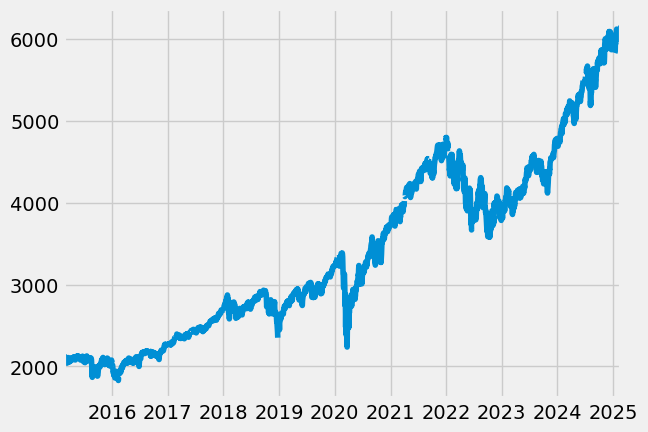

In [14]:
sp500.plot()

In [15]:
sp500.head()
# The first column is the date and the second column is the price of the S&P

2015-02-23    2109.66
2015-02-24    2115.48
2015-02-25    2113.86
2015-02-26    2110.74
2015-02-27    2104.50
dtype: float64

<Axes: title={'center': 'S&P 500'}>

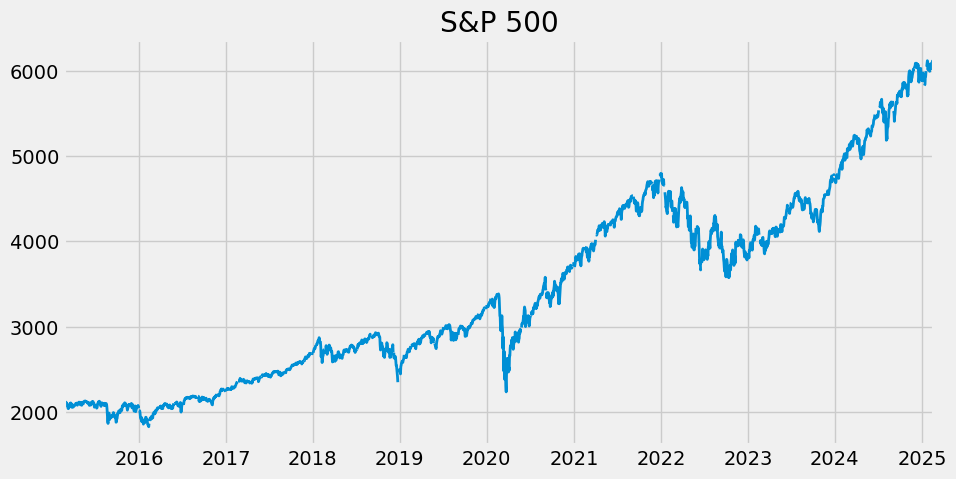

In [16]:
sp500.plot(figsize=(10,5),title = 'S&P 500', lw = 2)
# lw is the line width

In [17]:
type(sp500)

pandas.core.series.Series

# 4. Pull and Join Multiple Data Series

In [17]:
unemp_results = fred.search('unemployment')


In [20]:
unemp_results 

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2025-02-23,2025-02-23,Unemployment Rate,1948-01-01,2025-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-02-07 07:47:42-06:00,95,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2025-02-23,2025-02-23,Unemployment Rate,1948-01-01,2025-01-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2025-02-07 07:47:42-06:00,58,The unemployment rate represents the number of...
UNEMPLOY,UNEMPLOY,2025-02-23,2025-02-23,Unemployment Level,1948-01-01,2025-01-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2025-02-07 07:47:42-06:00,71,The series comes from the 'Current Population ...
NROU,NROU,2025-02-23,2025-02-23,Noncyclical Rate of Unemployment,1949-01-01,2034-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2024-07-01 12:01:04-05:00,69,"Starting with the July, 2021 report: An Update..."
CCSA,CCSA,2025-02-23,2025-02-23,Continued Claims (Insured Unemployment),1967-01-07,2025-02-08,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2025-02-20 07:37:35-06:00,74,"Continued claims, also referred to as insured ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LAUCN340030000000003A,LAUCN340030000000003A,2025-02-23,2025-02-23,"Unemployment Rate in Bergen County, NJ",1990-01-01,2023-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2024-05-01 10:48:38-05:00,0,These data come from the Current Population Su...
LMUNRRTTLUM156S,LMUNRRTTLUM156S,2025-02-23,2025-02-23,Infra-Annual Registered Unemployment and Job V...,1995-01-01,2023-12-01,Monthly,M,Growth rate previous period,Growth rate previous period,Seasonally Adjusted,SA,2024-04-10 11:07:38-05:00,5,OECD Data Filters: REF_AREA: LUX MEASURE: REG...
LNS14000315,LNS14000315,2025-02-23,2025-02-23,Unemployment Rate - Married Women,1955-01-01,2025-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-02-07 07:48:35-06:00,9,To obtain estimates of women worker employment...


In [19]:
unrate = fred.get_series('UNRATE')

In [22]:
unrate

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2024-09-01    4.1
2024-10-01    4.1
2024-11-01    4.2
2024-12-01    4.1
2025-01-01    4.0
Length: 925, dtype: float64

<Axes: >

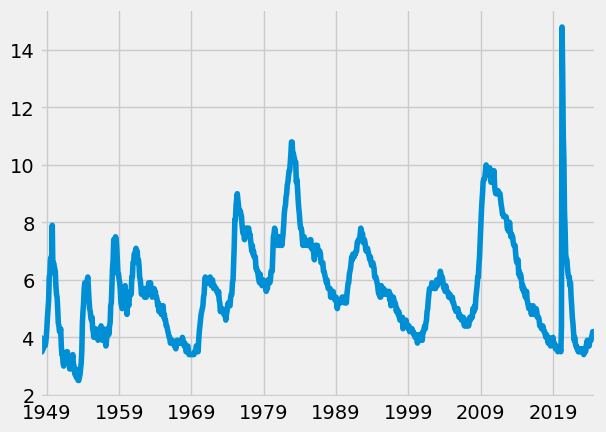

In [23]:
unrate.plot()

In [83]:
unemp_df = fred.search('unemployment rate state', filter = ('frequency','Monthly'))


In [85]:
unemp_df.query('seasonal_adjustment == "Seasonally Adjusted"')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2025-03-05,2025-03-05,Unemployment Rate,1948-01-01,2025-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-02-07 07:47:42-06:00,95,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2025-03-05,2025-03-05,Unemployment Rate - Black or African American,1972-01-01,2025-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-02-07 07:48:37-06:00,72,The series comes from the 'Current Population ...
UNEMPLOY,UNEMPLOY,2025-03-05,2025-03-05,Unemployment Level,1948-01-01,2025-01-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2025-02-07 07:47:42-06:00,71,The series comes from the 'Current Population ...
U6RATE,U6RATE,2025-03-05,2025-03-05,"Total Unemployed, Plus All Persons Marginally ...",1994-01-01,2025-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-02-07 07:47:48-06:00,67,The series comes from the 'Current Population ...
CAUR,CAUR,2025-03-05,2025-03-05,Unemployment Rate in California,1976-01-01,2024-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-01-29 08:59:02-06:00,64,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LASST340000000000005,LASST340000000000005,2025-03-05,2025-03-05,Employed Persons in New Jersey,1976-01-01,2024-12-01,Monthly,M,Persons,Persons,Seasonally Adjusted,SA,2025-02-05 10:06:38-06:00,1,These data come from the Current Population Su...
LASRD880000000000005,LASRD880000000000005,2025-03-05,2025-03-05,Employed Persons in Mountain Census Division,1976-01-01,2024-12-01,Monthly,M,Persons,Persons,Seasonally Adjusted,SA,2025-02-05 10:06:26-06:00,1,These data come from the Current Population Su...
LASRD830000000000005,LASRD830000000000005,2025-03-05,2025-03-05,Employed Persons in East North Central Census ...,1976-01-01,2024-12-01,Monthly,M,Persons,Persons,Seasonally Adjusted,SA,2025-02-05 10:06:24-06:00,1,These data come from the Current Population Su...


In [87]:
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [151]:
unemp_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2025-03-05,2025-03-05,Unemployment Rate,1948-01-01,2025-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-02-07 07:47:42-06:00,95,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2025-03-05,2025-03-05,Unemployment Rate - Black or African American,1972-01-01,2025-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-02-07 07:48:37-06:00,72,The series comes from the 'Current Population ...
CAUR,CAUR,2025-03-05,2025-03-05,Unemployment Rate in California,1976-01-01,2024-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-01-29 08:59:02-06:00,64,None
TXUR,TXUR,2025-03-05,2025-03-05,Unemployment Rate in Texas,1976-01-01,2024-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-01-29 08:58:03-06:00,56,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2025-03-05,2025-03-05,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,54,Series Is Presented Here As Three Variables--(...
LNS14000024,LNS14000024,2025-03-05,2025-03-05,Unemployment Rate - 20 Yrs. & over,1948-01-01,2025-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-02-07 07:48:37-06:00,56,The series comes from the 'Current Population ...
LNS14000031,LNS14000031,2025-03-05,2025-03-05,"Unemployment Rate - 20 Yrs. & over, Black or A...",1972-01-01,2025-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-02-07 07:48:36-06:00,56,The series comes from the 'Current Population ...
M0892BUSM156SNBR,M0892BUSM156SNBR,2025-03-05,2025-03-05,Unemployment Rate for United States,1940-01-01,1946-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:29:19-05:00,14,Series Is Presented Here As Three Variables--(...
NYUR,NYUR,2025-03-05,2025-03-05,Unemployment Rate in New York,1976-01-01,2024-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-01-29 08:58:04-06:00,53,None


In [27]:
unemp_df['title']

series id
UNRATE                                              Unemployment Rate
LNS14000006             Unemployment Rate - Black or African American
U6RATE              Total Unemployed, Plus All Persons Marginally ...
CAUR                                  Unemployment Rate in California
TXUR                                       Unemployment Rate in Texas
M0892AUSM156SNBR                  Unemployment Rate for United States
LNS14000024                        Unemployment Rate - 20 Yrs. & over
LNS14000031         Unemployment Rate - 20 Yrs. & over, Black or A...
M0892BUSM156SNBR                  Unemployment Rate for United States
NYUR                                    Unemployment Rate in New York
U2RATE                           Unemployment Rate - Job Losers (U-2)
FLUR                                     Unemployment Rate in Florida
LNS14000002                                 Unemployment Rate - Women
LNS14000009                    Unemployment Rate - Hispanic or Latino
LNS1400000

In [29]:
unemp_df['title'].str.contains('Unemployment Rate')

series id
UNRATE               True
LNS14000006          True
U6RATE              False
CAUR                 True
TXUR                 True
M0892AUSM156SNBR     True
LNS14000024          True
LNS14000031          True
M0892BUSM156SNBR     True
NYUR                 True
U2RATE               True
FLUR                 True
LNS14000002          True
LNS14000009          True
LNS14000003          True
PAUR                 True
OHUR                 True
U4RATE              False
LNS14000001          True
LNS14027660          True
MIUR                 True
LNS14027662          True
ALUR                 True
LNS14024887          True
MAUR                 True
NCUR                 True
ILUR                 True
NJUR                 True
GAUR                 True
COUR                 True
U1RATE              False
AZUR                 True
WIUR                 True
VAUR                 True
KYUR                 True
U5RATE              False
LRUN64TTUSM156S      True
SCUR                 True
NM

In [115]:
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [64]:
# Go through each of these IDs and pull the series data down

In [117]:
unemp_df.index

Index(['UNRATE', 'LNS14000006', 'CAUR', 'TXUR', 'M0892AUSM156SNBR',
       'LNS14000024', 'LNS14000031', 'M0892BUSM156SNBR', 'NYUR', 'U2RATE',
       'FLUR', 'LNS14000002', 'LNS14000009', 'LNS14000003', 'PAUR', 'OHUR',
       'LNS14000001', 'LNS14027660', 'MIUR', 'LNS14027662', 'ALUR',
       'LNS14024887', 'MAUR', 'NCUR', 'ILUR', 'NJUR', 'GAUR', 'COUR', 'AZUR',
       'WIUR', 'VAUR', 'KYUR', 'LRUN64TTUSM156S', 'SCUR', 'NMUR', 'MNUR',
       'TNUR', 'LNS14032183', 'LNS14000012', 'WAUR', 'LNS14027659', 'MDUR',
       'ORUR', 'WVUR', 'NVUR', 'ARUR'],
      dtype='object', name='series id')

In [91]:
#Going through each of the IDs
for myid in unemp_df.index:
    results = fred.get_series(myid)
    break

In [37]:
results

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2024-09-01    4.1
2024-10-01    4.1
2024-11-01    4.2
2024-12-01    4.1
2025-01-01    4.0
Length: 925, dtype: float64

In [39]:
results.to_frame(name=myid)

,UNRATE
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5
...,...
2024-09-01,4.1
2024-10-01,4.1
2024-11-01,4.2
2024-12-01,4.1


In [119]:
# Making a list to store all the results in

all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)

# all_results becomes a list of dataframes

In [95]:
all_results[3]

,CAUR
1976-01-01,9.2
1976-02-01,9.2
1976-03-01,9.1
1976-04-01,9.1
1976-05-01,9.0
...,...
2024-08-01,5.3
2024-09-01,5.3
2024-10-01,5.4
2024-11-01,5.4


In [45]:
type(all_results)

list

In [97]:
# Concatination the contents of the list


pd.concat(all_results, axis = 1)

,UNRATE,LNS14000006,U6RATE,CAUR,TXUR,M0892AUSM156SNBR,LNS14000024,LNS14000031,M0892BUSM156SNBR,NYUR,U2RATE,FLUR,LNS14000002,LNS14000009,LNS14000003,PAUR,OHUR,U4RATE,LNS14000001,LNS14027660,MIUR,LNS14027662,ALUR,LNS14024887,MAUR,NCUR,ILUR,NJUR,GAUR,COUR,U1RATE,AZUR,WIUR,VAUR,KYUR,U5RATE,LRUN64TTUSM156S,SCUR,NMUR,MNUR,LBSSA06,TNUR,LNS14032183,LNS14000012,WAUR,LNS14027659,MDUR,ORUR,WVUR,NVUR,ARUR,USSLIND
1929-04-01,NaN,NaN,NaN,NaN,NaN,0.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-01,NaN,NaN,NaN,NaN,NaN,1.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-06-01,NaN,NaN,NaN,NaN,NaN,2.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-07-01,NaN,NaN,NaN,NaN,NaN,0.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-08-01,NaN,NaN,NaN,NaN,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-01,4.1,5.7,7.7,5.3,4.1,NaN,3.7,5.2,NaN,4.4,1.9,3.3,3.9,5.1,3.7,3.4,4.5,4.3,4.2,4.0,4.5,2.3,2.9,9.2,3.8,3.8,5.3,4.7,3.6,4.0,1.6,3.5,2.9,2.9,4.9,5.0,4.134869,4.5,4.2,3.4,62.1,3.2,4.1,14.2,4.8,6.8,2.9,4.0,4.2,5.6,3.3,NaN
2024-10-01,4.1,5.7,7.7,5.4,4.1,NaN,3.8,5.7,NaN,4.4,2.0,3.3,4.0,5.1,3.8,3.4,4.3,4.4,4.2,4.0,4.6,2.5,2.9,9.5,3.9,3.7,5.3,4.7,3.6,4.1,1.7,3.6,2.9,2.9,5.0,5.0,4.201423,4.7,4.3,3.4,62.1,3.3,3.9,13.7,4.7,6.6,3.0,4.0,4.2,5.7,3.3,NaN
2024-11-01,4.2,6.4,7.7,5.4,4.2,NaN,3.9,6.0,NaN,4.4,2.0,3.4,4.2,5.3,3.8,3.5,4.3,4.5,4.3,4.6,4.8,2.5,3.1,9.4,4.0,3.7,5.3,4.6,3.7,4.3,1.7,3.7,2.9,3.0,5.1,5.1,4.331533,4.8,4.4,3.5,62.1,3.5,3.8,13.1,4.6,6.0,3.1,4.0,4.2,5.7,3.3,NaN
2024-12-01,4.1,6.1,7.5,5.5,4.2,NaN,3.7,5.6,NaN,4.4,1.9,3.4,4.1,5.1,3.6,3.6,4.4,4.4,4.1,4.3,5.0,2.4,3.3,9.0,4.1,3.7,5.2,4.6,3.7,4.4,1.6,3.8,3.0,3.0,5.2,5.0,4.156555,4.7,4.4,3.3,62.1,3.6,3.5,12.4,4.5,5.6,3.1,4.1,4.2,5.7,3.4,NaN


In [121]:
uemp_results = pd.concat(all_results, axis = 1)

In [125]:
cols_to_drop = []
for i in uemp_results:
    if len(i) > 4:
        cols_to_drop.append(i)
uemp_results = uemp_results.drop(columns = cols_to_drop, axis=1)

In [135]:
# Dropping the first column because it is not a state-wide unemployment rate
uemp_states = uemp_results.copy()  #.drop('UNRATE', axis=1)


In [133]:
uemp_states

,CAUR,TXUR,NYUR,FLUR,PAUR,OHUR,MIUR,ALUR,MAUR,NCUR,ILUR,NJUR,GAUR,COUR,AZUR,WIUR,VAUR,KYUR,SCUR,NMUR,MNUR,TNUR,WAUR,MDUR,ORUR,WVUR,NVUR,ARUR
1929-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-01,5.3,4.1,4.4,3.3,3.4,4.5,4.5,2.9,3.8,3.8,5.3,4.7,3.6,4.0,3.5,2.9,2.9,4.9,4.5,4.2,3.4,3.2,4.8,2.9,4.0,4.2,5.6,3.3
2024-10-01,5.4,4.1,4.4,3.3,3.4,4.3,4.6,2.9,3.9,3.7,5.3,4.7,3.6,4.1,3.6,2.9,2.9,5.0,4.7,4.3,3.4,3.3,4.7,3.0,4.0,4.2,5.7,3.3
2024-11-01,5.4,4.2,4.4,3.4,3.5,4.3,4.8,3.1,4.0,3.7,5.3,4.6,3.7,4.3,3.7,2.9,3.0,5.1,4.8,4.4,3.5,3.5,4.6,3.1,4.0,4.2,5.7,3.3
2024-12-01,5.5,4.2,4.4,3.4,3.6,4.4,5.0,3.3,4.1,3.7,5.2,4.6,3.7,4.4,3.8,3.0,3.0,5.2,4.7,4.4,3.3,3.6,4.5,3.1,4.1,4.2,5.7,3.4


In [137]:
# This will tell us how many missing values there are for each date
uemp_states.isna().sum(axis = 1)

1929-04-01    28
1929-05-01    28
1929-06-01    28
1929-07-01    28
1929-08-01    28
              ..
2024-09-01     0
2024-10-01     0
2024-11-01     0
2024-12-01     0
2025-01-01    28
Length: 1138, dtype: int64

<Axes: >

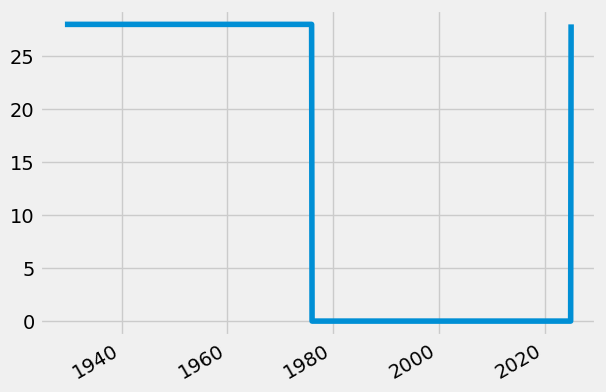

In [139]:
uemp_states.isna().sum(axis = 1).plot()

In [143]:
uemp_states = uemp_states.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]

In [174]:
[c for c in uemp_states.columns]

['California',
 'Texas',
 'New York',
 'Florida',
 'Pennsylvania',
 'Ohio',
 'Michigan',
 'Alabama',
 'Massachusetts',
 'North Carolina',
 'Illinois',
 'New Jersey',
 'Georgia',
 'Colorado',
 'Arizona',
 'Wisconsin',
 'Virginia',
 'Kentucky',
 'South Carolina',
 'New Mexico',
 'Minnesota',
 'Tennessee',
 'Washington',
 'Maryland',
 'Oregon',
 'West Virginia',
 'Nevada',
 'Arkansas']

In [149]:
uemp_states.columns 

Index(['California', 'Texas', 'New York', 'Florida', 'Pennsylvania', 'Ohio',
       'Michigan', 'Alabama', 'Massachusetts', 'North Carolina', 'Illinois',
       'New Jersey', 'Georgia', 'Colorado', 'Arizona', 'Wisconsin', 'Virginia',
       'Kentucky', 'South Carolina', 'New Mexico', 'Minnesota', 'Tennessee',
       'Washington', 'Maryland', 'Oregon', 'West Virginia', 'Nevada',
       'Arkansas'],
      dtype='object')

In [145]:
uemp_states

,California,Texas,New York,Florida,Pennsylvania,Ohio,Michigan,Alabama,Massachusetts,North Carolina,Illinois,New Jersey,Georgia,Colorado,Arizona,Wisconsin,Virginia,Kentucky,South Carolina,New Mexico,Minnesota,Tennessee,Washington,Maryland,Oregon,West Virginia,Nevada,Arkansas
1976-01-01,9.2,5.8,10.3,9.7,8.0,8.1,9.9,6.6,10.5,6.4,6.6,10.3,8.4,5.8,10.2,5.8,6.1,5.6,7.4,8.6,6.0,6.0,8.5,6.4,9.5,7.5,9.2,7.3
1976-02-01,9.2,5.8,10.3,9.7,8.1,8.1,9.9,6.6,10.5,6.4,6.6,10.3,8.4,5.7,10.2,5.8,6.1,5.6,7.4,8.7,6.0,6.0,8.5,6.4,9.5,7.5,9.2,7.3
1976-03-01,9.1,5.9,10.2,9.6,8.1,8.1,9.9,6.6,10.5,6.4,6.6,10.3,8.4,5.7,10.1,5.7,6.1,5.6,7.3,8.7,5.9,6.0,8.4,6.4,9.4,7.5,9.2,7.3
1976-04-01,9.1,5.9,10.2,9.5,8.1,8.0,9.8,6.5,10.3,6.3,6.6,10.3,8.3,5.6,10.0,5.6,6.0,5.6,7.2,8.6,5.8,6.0,8.5,6.4,9.2,7.5,9.0,7.2
1976-05-01,9.0,5.9,10.1,9.3,8.1,7.8,9.6,6.4,10.1,6.1,6.6,10.3,8.1,5.6,9.8,5.5,5.9,5.5,7.0,8.6,5.7,5.9,8.5,6.5,9.1,7.4,8.9,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-01,5.3,4.1,4.4,3.3,3.4,4.5,4.5,2.8,3.7,3.8,5.3,4.8,3.6,4.0,3.4,2.9,2.8,4.8,4.3,4.1,3.3,3.1,4.8,2.9,4.0,4.2,5.5,3.3
2024-09-01,5.3,4.1,4.4,3.3,3.4,4.5,4.5,2.9,3.8,3.8,5.3,4.7,3.6,4.0,3.5,2.9,2.9,4.9,4.5,4.2,3.4,3.2,4.8,2.9,4.0,4.2,5.6,3.3
2024-10-01,5.4,4.1,4.4,3.3,3.4,4.3,4.6,2.9,3.9,3.7,5.3,4.7,3.6,4.1,3.6,2.9,2.9,5.0,4.7,4.3,3.4,3.3,4.7,3.0,4.0,4.2,5.7,3.3
2024-11-01,5.4,4.2,4.4,3.4,3.5,4.3,4.8,3.1,4.0,3.7,5.3,4.6,3.7,4.3,3.7,2.9,3.0,5.1,4.8,4.4,3.5,3.5,4.6,3.1,4.0,4.2,5.7,3.3


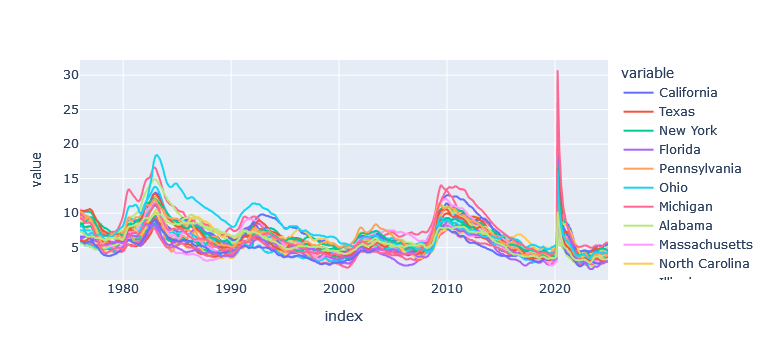

In [147]:
# Plot states unemployment rate
px.line(uemp_states)

# Pull April 2020 unemployment rate per state 

In [158]:
uemp_states.loc[uemp_states.index == '2020-04-01']  

,California,Texas,New York,Florida,Pennsylvania,Ohio,Michigan,Alabama,Massachusetts,North Carolina,Illinois,New Jersey,Georgia,Colorado,Arizona,Wisconsin,Virginia,Kentucky,South Carolina,New Mexico,Minnesota,Tennessee,Washington,Maryland,Oregon,West Virginia,Nevada,Arkansas
2020-04-01,16.1,12.8,15.6,13.4,16.1,16.5,22.6,13.8,17.4,14.2,18.1,15.0,12.4,11.2,13.8,14.0,12.0,16.8,11.8,9.0,8.9,15.8,16.7,9.0,13.7,15.8,30.6,10.1


In [162]:
uemp_states.loc[uemp_states.index == '2020-04-01'].T.sort_values('2020-04-01') 


,2020-04-01
Minnesota,8.9
Maryland,9.0
New Mexico,9.0
Arkansas,10.1
Colorado,11.2
South Carolina,11.8
Virginia,12.0
Georgia,12.4
Texas,12.8
Florida,13.4


<Axes: title={'center': 'Unemployment Rate by State, April 2020'}>

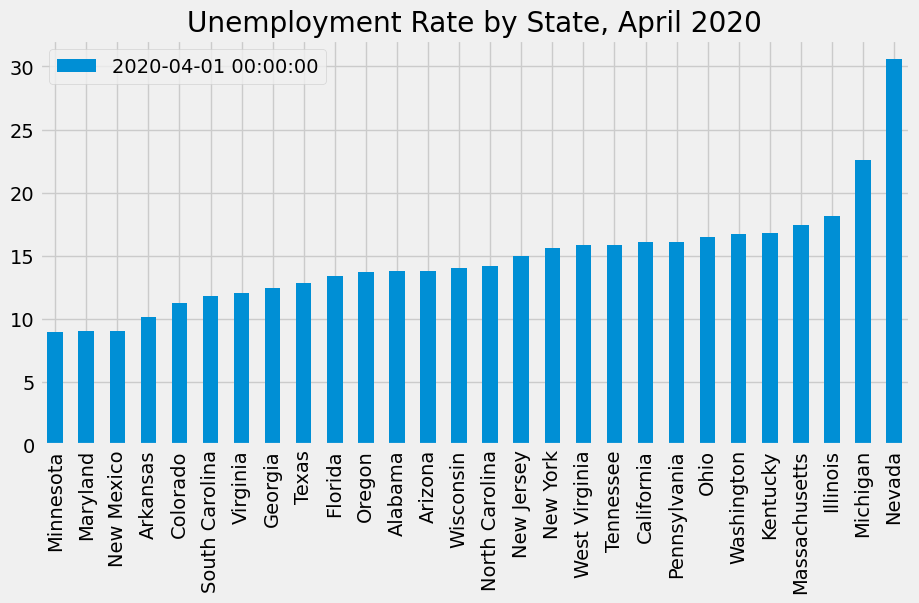

In [166]:
uemp_states.loc[uemp_states.index == '2020-04-01'].T \
.sort_values('2020-04-01') \
.plot(kind = 'bar', figsize = (10,5) , title = 'Unemployment Rate by State, April 2020')

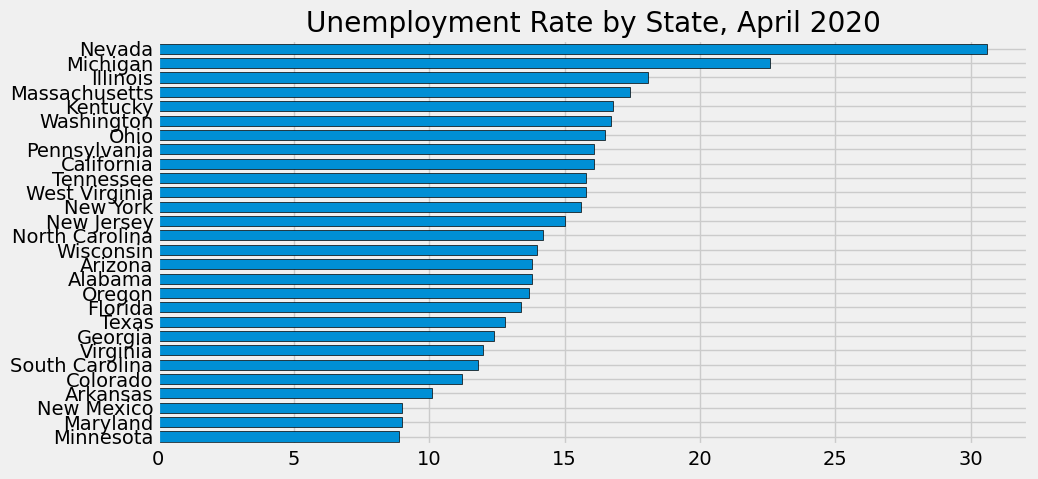

In [182]:
# We can remove the legend from the plot

ax = uemp_states.loc[uemp_states.index == '2020-04-01'].T \
.sort_values('2020-04-01') \
.plot(kind = 'barh', figsize = (10,5) , width=0.7, edgecolor='black', title='Unemployment Rate by State, April 2020')

ax.legend().remove()
plt.show()

# Pull Participation Rate

In [235]:
part_df = fred.search('participation rate state', filter = ('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [257]:
part_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CIVPART,CIVPART,2025-03-06,2025-03-06,Labor Force Participation Rate,1948-01-01,2025-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-02-07 07:48:54-06:00,84,The series comes from the 'Current Population ...
LNS11300060,LNS11300060,2025-03-06,2025-03-06,Labor Force Participation Rate - 25-54 Yrs.,1948-01-01,2025-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-02-07 07:48:51-06:00,70,The series comes from the 'Current Population ...
LNS11300002,LNS11300002,2025-03-06,2025-03-06,Labor Force Participation Rate - Women,1948-01-01,2025-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-02-07 07:49:10-06:00,66,To obtain estimates of women worker employment...
LNS11300001,LNS11300001,2025-03-06,2025-03-06,Labor Force Participation Rate - Men,1948-01-01,2025-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-02-07 07:49:10-06:00,61,The series comes from the 'Current Population ...
LNS11324230,LNS11324230,2025-03-06,2025-03-06,Labor Force Participation Rate - 55 Yrs. & over,1948-01-01,2025-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-02-07 07:48:51-06:00,54,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LRIN74MAUSM156S,LRIN74MAUSM156S,2025-03-06,2025-03-06,Infra-Annual Labor Statistics: Inactivity Rate...,1981-01-01,2025-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-02-17 13:49:07-06:00,1,OECD Data Filters: REF_AREA: USA MEASURE: OLF...
LRIN64MAUSM156S,LRIN64MAUSM156S,2025-03-06,2025-03-06,Infra-Annual Labor Statistics: Inactivity Rate...,1977-01-01,2025-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-02-17 13:49:12-06:00,1,OECD Data Filters: REF_AREA: USA MEASURE: OLF...
LRIN64FEUSM156S,LRIN64FEUSM156S,2025-03-06,2025-03-06,Infra-Annual Labor Statistics: Inactivity Rate...,1977-01-01,2025-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-02-17 13:49:15-06:00,1,OECD Data Filters: REF_AREA: USA MEASURE: OLF...


In [195]:
part_df.shape

(109, 15)

In [239]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

In [249]:
all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)

part_states = pd.concat(all_results, axis = 1)

In [245]:
cols_to_drop = []
for i in part_states:
    if len(i) > 4:
        cols_to_drop.append(i)
part_states = part_states.drop(columns = cols_to_drop, axis=1)

In [255]:
for i in part_states:
    print(len(i))

7
11
11
11
11
11
11
15
11
15
11
7
11
11
7
11
11
7
11
7
7
11
11
7
7
7
7
7
7
7
7
7
7
7
11
7
7
7
7
7
7
7
7
7
7
11
7
15
7
15
7
7
11
7
7
7
11
7
7
7
7
7
7
7
7
7
7
7
7
7
15
7
11
7
7
7
7
11
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15


In [250]:
part_states

,CIVPART,LNS11300060,LNS11300002,LNS11300001,LNS11324230,LNS11300012,LNS11300006,LRAC25MAUSM156S,LNS11300036,LRAC25FEUSM156S,LNS11327662,LBSSA06,LNS11300028,LNS11300031,LBSSA01,LNS11300003,LNS11327660,LBSSA36,LNS11300029,LBSSA26,LBSSA28,LNS11300009,LNS11300032,LBSSA48,LBSSA12,LBSSA21,LBSSA39,LBSSA55,LBSSA42,LBSSA25,LBSSA27,LBSSA24,LBSSA54,LBSSA47,LNS11327659,LBSSA23,LBSSA17,LBSSA37,LBSSA13,LBSSA22,LBSSA45,LBSSA08,LBSSA49,LBSSA51,LBSSA18,LNS11300026,LBSSA29,LRIN64TTUSM156S,LBSSA34,LRAC64TTUSM156S,LBSSA19,LBSSA02,LNS11300025,LBSSA53,LBSSA04,LBSSA35,LNS11327689,LBSSA16,LBSSA05,LBSSA40,LBSSA31,LBSSA15,LBSSA32,LBSSA30,LBSSA41,LBSSA33,LBSSA50,LBSSA09,LBSSA38,LBSSA46,LRAC55TTUSM156S,LBSSA20,LNS11300015,LBSSA44,LBSSA11,LBSSA10,LBSSA56,LNS11300018,LRAC24TTUSM156S,LRAC74TTUSM156S,LRIN25MAUSM156S,LRACTTFEUSM156S,LRAC25TTUSM156S,LRACTTTTUSM156S,LRACTTMAUSM156S,LRAC55MAUSM156S,LRAC64FEUSM156S,LRAC55FEUSM156S,LRAC24MAUSM156S,LRAC74FEUSM156S,LRAC24FEUSM156S,LRAC64MAUSM156S,LRAC74MAUSM156S,LRINTTTTUSM156S,LRINTTMAUSM156S,LRINTTFEUSM156S,LRIN55TTUSM156S,LRIN74TTUSM156S,LRIN24TTUSM156S,LRIN25TTUSM156S,LRIN55MAUSM156S,LRIN24MAUSM156S,LRIN24FEUSM156S,LRIN74FEUSM156S,LRIN74MAUSM156S,LRIN64MAUSM156S,LRIN64FEUSM156S,LRIN55FEUSM156S,LRIN25FEUSM156S
1948-01-01,58.6,64.2,32.0,86.7,43.0,53.2,NaN,NaN,64.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,NaN,NaN,NaN,NaN,NaN,NaN,88.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-02-01,58.9,64.6,32.4,87.0,43.3,53.7,NaN,NaN,64.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.4,NaN,NaN,NaN,NaN,NaN,NaN,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-03-01,58.5,64.3,32.1,86.3,43.0,54.1,NaN,NaN,63.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.1,NaN,NaN,NaN,NaN,NaN,NaN,88.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-04-01,59.0,64.8,33.0,86.6,43.4,54.2,NaN,NaN,63.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.1,NaN,NaN,NaN,NaN,NaN,NaN,88.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-05-01,58.3,64.3,32.0,86.1,43.2,50.9,NaN,NaN,63.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.3,NaN,NaN,NaN,NaN,NaN,NaN,88.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-01,62.7,83.8,57.6,68.1,38.5

In [225]:
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

In [227]:
part_states.columns

Index(['Labor Force Participation Rate',
       'Labor Force Participation Rate - 25-54 Yrs.',
       'Labor Force Participation Rate - Women',
       'Labor Force Participation Rate - Men',
       'Labor Force Participation Rate - 55 Yrs. & over',
       'Labor Force Participation Rate - 16-19 Yrs.',
       'Labor Force Participation Rate - Black or African American',
       'Infra-Annual Labor Statistics: Labor Force Participation Rate Male: From 25 to 54 Years for United States',
       'Labor Force Participation Rate - 20-24 Yrs.',
       'Infra-Annual Labor Statistics: Labor Force Participation Rate Female: From 25 to 54 Years for United States',
       ...
       'Infra-Annual Labor Statistics: Inactivity Rate Total: From 25 to 54 Years for United States',
       'Infra-Annual Labor Statistics: Inactivity Rate Male: From 55 to 64 Years for United States',
       'Infra-Annual Labor Statistics: Inactivity Rate Male: From 15 to 24 Years for United States',
       'Infra-Annual Labo

In [229]:
cols_to_drop = []
for i in part_df:
    if len(i) > 4:
        cols_to_drop.append(i)
part_df = part_df.drop(columns = cols_to_drop, axis=1)

In [233]:
part_df.shape

(109, 1)